In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age              3
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

#### We will start by checking missing data!

In [68]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


#### using Seaborn to create a simple HEAT MAP to see where we are missing data

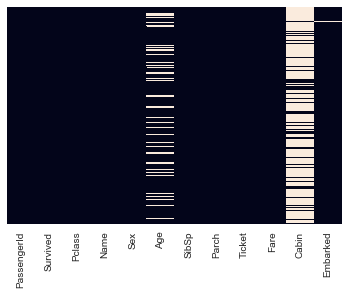

In [69]:
sns.heatmap(train.isnull(),yticklabels = False,cbar = False)

#### Number of people Survived

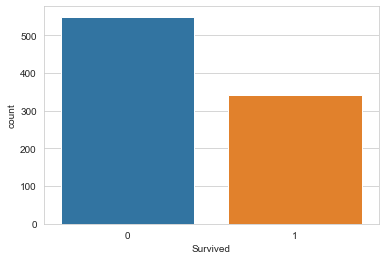

In [70]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = train)

#### Survive number based on the gender

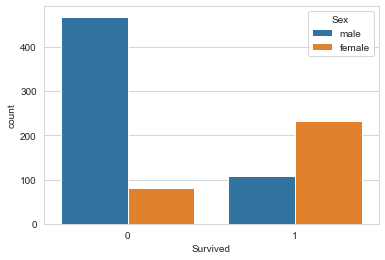

In [71]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = train)

#### Number of people survived based on Ticket_class

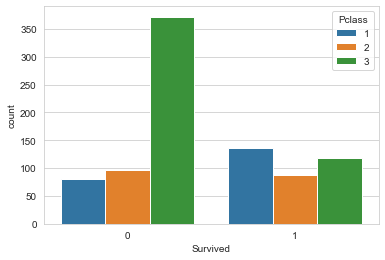

In [72]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived' , hue = 'Pclass', data = train)

#### Number of Deaths based on Age 

[Text(0, 0.5, 'Number of deaths'), Text(0.5, 0, 'Age')]

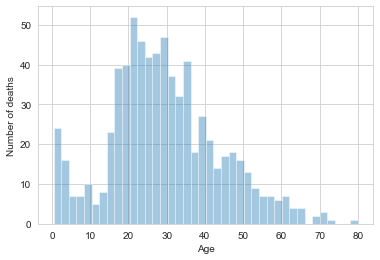

In [73]:
ak = sns.distplot(train['Age'].dropna() ,kde = False ,bins = 40)
ak.set(xlabel = "Age", ylabel = "Number of deaths")
#dropna Remove missing values.
#A kernel density estimate (KDE) allows us to estimate probability density function curve in one or more dimensions.

#### Number of siblings / spouses aboard the Titanic

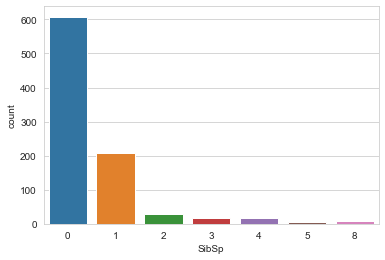

In [74]:
sns.countplot(x = "SibSp", data = train)

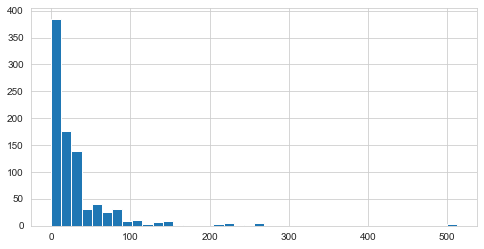

In [75]:
train['Fare'].hist(bins=40, figsize = (8,4))

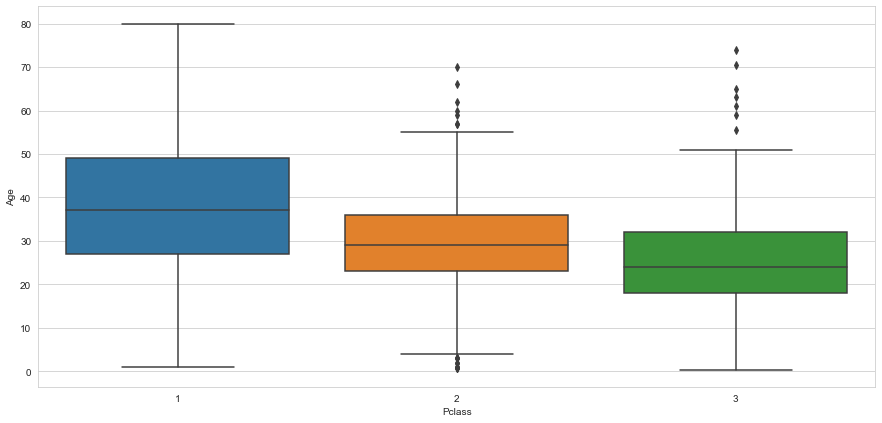

In [76]:
plt.figure(figsize = (15,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [87]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 28
        if Pclass == 3:
            return 24
        else:
            return Age

In [95]:
train['Age'] = train[['Age','Pclass']].apply(input_age,axis = 1)

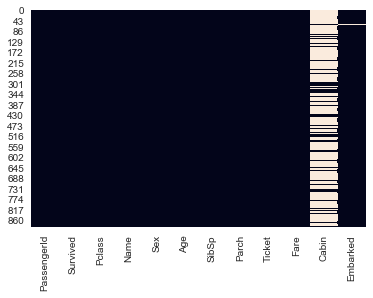

In [97]:
sns.heatmap(train.isnull(),cbar = False)

In [113]:
train.drop('Cabin',axis = 1,inplace = True)

KeyError: "['Cabin'] not found in axis"

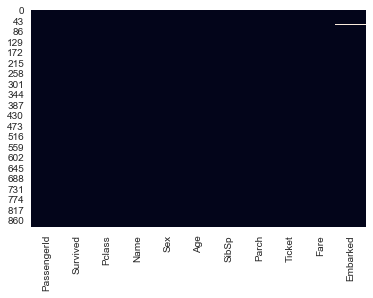

In [114]:
sns.heatmap(train.isnull(),cbar = False)

## Converting Categorical Feature

converting Categorical Features into dummy variables using pandas

In [119]:
sex = pd.get_dummies(train['Sex'])
embark = pd.get_dummies(train['Embarked'])

In [126]:
train.drop(['Sex','Embarked','Name','Ticket'],axis = 1,inplace = True)

In [127]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,24,1,0,7.2500
1,2,1,1,37,1,0,71.2833
2,3,1,3,24,0,0,7.9250
3,4,1,1,37,1,0,53.1000
4,5,0,3,24,0,0,8.0500


In [128]:
train = pd.concat([train,sex,embark],axis = 1)

In [129]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,24,1,0,7.2500,0,1,0,0,1
1,2,1,1,37,1,0,71.2833,1,0,1,0,0
2,3,1,3,24,0,0,7.9250,1,0,0,0,1
3,4,1,1,37,1,0,53.1000,1,0,0,0,1
4,5,0,3,24,0,0,8.0500,0,1,0,0,1


In [130]:
#Great our data is Ready for our model!

In [132]:
train.drop('Survived',axis=1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,3,24,1,0,7.2500,0,1,0,0,1
1,2,1,37,1,0,71.2833,1,0,1,0,0
2,3,3,24,0,0,7.9250,1,0,0,0,1
3,4,1,37,1,0,53.1000,1,0,0,0,1
4,5,3,24,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,28,0,0,13.0000,0,1,0,0,1
887,888,1,37,0,0,30.0000,1,0,0,0,1
888,889,3,24,1,2,23.4500,1,0,0,0,1
889,890,1,37,0,0,30.0000,0,1,1,0,0


In [134]:
from sklearn.model_selection import train_test_split

In [150]:
x_train,x_test,y_train,y_test = train_test_split(train.drop('Survived',axis = 1),train['Survived'], test_size = 0.30)

## Train and Prediction 

In [148]:
from sklearn.linear_model import LogisticRegression

In [151]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
from sklearn.metrics import confusion_matrix